In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models

In [18]:
print(os.listdir('chest_xray'))

print(len(os.listdir('chest_xray/NORMAL')))
print(len(os.listdir('chest_xray/PNEUMONIA')))

['NORMAL', 'PNEUMONIA']
1583
4273


In [19]:
base_dir = 'chest_xray'

## DATA PREPROCESSING

(1041, 1616)


<function matplotlib.pyplot.show(close=None, block=None)>

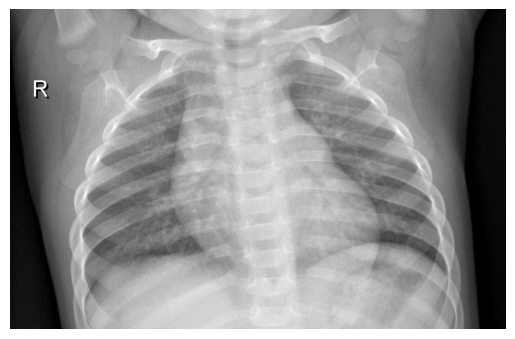

In [20]:
image_path= 'D:/DL CB/chest_xray/NORMAL/NORMAL-4512-0001.jpeg'

#Read the image
img = mpimg.imread(image_path)

print(img.shape)
#displaying the image
plt.imshow(img,cmap='gray')
plt.axis('off') ## turn off the axis numbers
plt.show

In [39]:
img_size = 224
batch_size = 32

# Train Test Split

In [40]:
#Image data generator
data_gen = ImageDataGenerator(
    rescale = 1/255,
    validation_split = 0.2 #use 20% data for validation
)

In [41]:
#Image Data Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 4686 images belonging to 2 classes.


In [42]:
#Validation Generator
validation_generator =  data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 1170 images belonging to 2 classes.


# Convolutional Neural Network

In [25]:
num_classes = 2

In [46]:
#Model defination
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes,activation='sigmoid'))

In [47]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 128)     

In [49]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [50]:
##training the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples//batch_size, ##number of steps per epoch
    epochs = 7,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples//batch_size
)

Epoch 1/7


146/146 [==============================] - 185s 1s/step - loss: 0.4071 - accuracy: 0.8247 - val_loss: 0.1520 - val_accuracy: 0.9410
Epoch 2/7
146/146 [==============================] - 161s 1s/step - loss: 0.1966 - accuracy: 0.9334 - val_loss: 0.1243 - val_accuracy: 0.9583
Epoch 3/7
146/146 [==============================] - 170s 1s/step - loss: 0.1536 - accuracy: 0.9463 - val_loss: 0.1579 - val_accuracy: 0.9470
Epoch 4/7
146/146 [==============================] - 165s 1s/step - loss: 0.1226 - accuracy: 0.9583 - val_loss: 0.1306 - val_accuracy: 0.9531
Epoch 5/7
146/146 [==============================] - 165s 1s/step - loss: 0.1018 - accuracy: 0.9615 - val_loss: 0.1437 - val_accuracy: 0.9497
Epoch 6/7
146/146 [==============================] - 160s 1s/step - loss: 0.0982 - accuracy: 0.9637 - val_loss: 0.1695 - val_accuracy: 0.9436
Epoch 7/7
146/146 [==============================] - 159s 1s/step - loss: 0.0839 - accuracy: 0.9693 - val_loss: 0.1330 - val_accuracy: 0.9670


In [51]:
  #Model Evalution
print("Evaluating Model...")
val_loss, val_accuracy = model.evaluate(validation_generator,steps = validation_generator.samples //batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating Model...
36/36 [==============================] - 22s 602ms/step - loss: 0.1376 - accuracy: 0.9653
Validation Accuracy: 96.53%


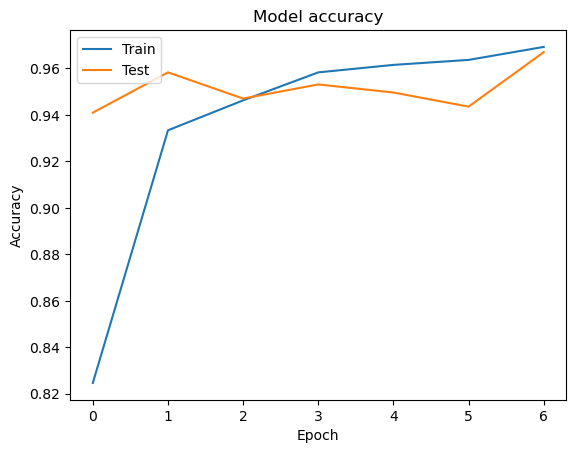

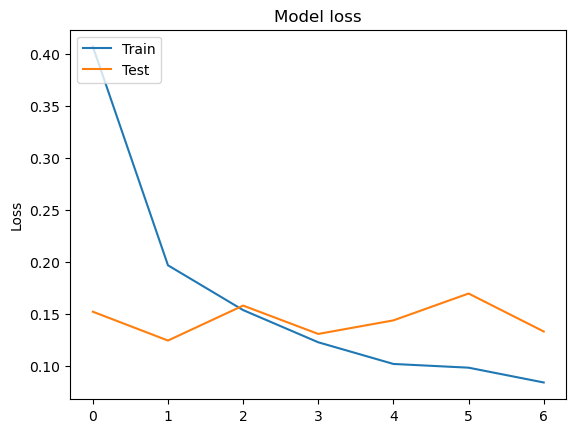

In [52]:
#Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

#PLot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [53]:
model.save('D:/DL CB/ches_xray_model.h5')

C:\Users\prati\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [59]:
from PIL import Image

In [90]:
#Function to load and preprocess the image using pillow
def load_and_preprocess_image(image_path,target_size=(224,224)):
  #load the image
  img = Image.open(image_path)
  #resize the image
  img = img.resize(target_size)
  #convert the image to a numpy array
  img_array = np.array(img)
  #add batch dimension
  img_array = np.expand_dims(img_array,axis=0)
  #Scale the image values to [0,1]
  img_array = img_array.astype('float32')/255.
  return img_array

#Function to predict the class of an image
def predict_image_class(model,image_path,class_indices):
  preprocessed_img = load_and_preprocess_image(image_path)
  predictions = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(predictions,axis=1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

In [91]:
#create a mapping from class indices to class name
class_indices = {v:k for k,v in train_generator.class_indices.items()}

In [92]:
class_indices

{0: 'NORMAL', 1: 'PNEUMONIA'}

In [93]:
#saving the class name as json file
json.dump(class_indices, open('class_indices.json','w'))

In [94]:
image_path = 'D:/DL CB/chest_xray/PNEUMONIA/BACTERIA-7422-0001.jpeg'

predicted_class_name = predict_image_class(model,image_path,class_indices)

#OUtput the result
print("Predicted Class Name : ",predicted_class_name)

ValueError: in user code:

    File "C:\Users\prati\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\prati\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\prati\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\prati\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\prati\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\prati\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_15' (type Sequential).
    
    Input 0 of layer "conv2d_4" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 224, 224)
    
    Call arguments received by layer 'sequential_15' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 224, 224), dtype=float32)
      • training=False
      • mask=None
